In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data_status = pd.read_csv('/home/kyohei/bike_share_data/201402_babs_open_data/201402_status_data.csv')
data_station = pd.read_csv('/home/kyohei/bike_share_data/201402_babs_open_data/201402_station_data.csv')
data_trip = pd.read_csv('/home/kyohei/bike_share_data/201402_babs_open_data/201402_trip_data.csv')
data_weather = pd.read_csv('/home/kyohei/bike_share_data/201402_babs_open_data/201402_weather_data.csv')

# 基本情報の整理

### stationの情報
- ステーションの名前、ステーションの緯度経度、ステーションのドック数、所在市、サービス開始日

In [4]:
data_station.head()

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [211]:
data_station.tail()

,station_id,name,lat,long,dockcount,landmark,installation
64,76,Market at 4th,37.786305,-122.404966,19,San Francisco,2013-08-25
65,77,Market at Sansome,37.789625,-122.400811,27,San Francisco,2013-08-25
66,80,San Jose Government Center,37.352601,-121.905733,15,San Jose,2013-12-31
67,82,Broadway St at Battery St,37.798541,-122.400862,15,San Francisco,2014-01-22
68,83,Mezes Park,37.491269,-122.236234,15,Redwood City,2014-02-20


In [5]:
data_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 7 columns):
station_id      69 non-null int64
name            69 non-null object
lat             69 non-null float64
long            69 non-null float64
dockcount       69 non-null int64
landmark        69 non-null object
installation    69 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 3.8+ KB


In [6]:
#dockcountの分布
data_station.dockcount.value_counts().sort_index()

11     4
15    33
19    18
23     9
25     1
27     4
Name: dockcount, dtype: int64

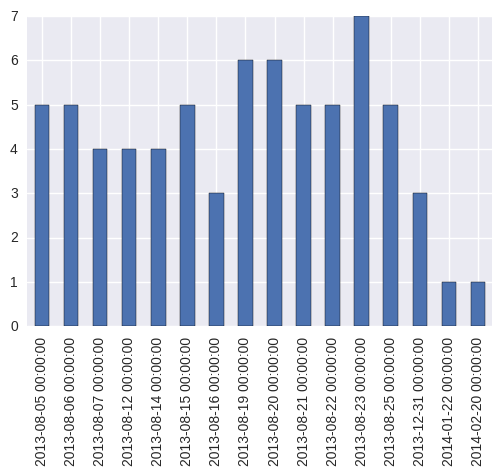

In [7]:
#サービス開始日
data_station['installation'] = pd.to_datetime(data_station.installation)
data_station.installation.value_counts().sort_index().plot(kind='bar')

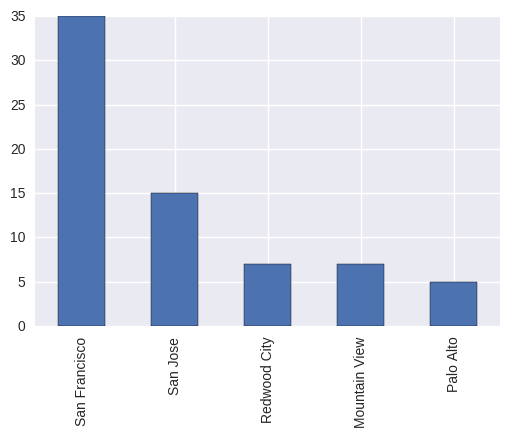

In [8]:
#市毎の設置台数
data_station.landmark.value_counts().plot(kind='bar')

- ドックの数は約半数が15で、maxが27、minが11
- サービス開始日はほとんどが8月だが、年末年始も少しある。
- san franciscoの設置数が35で最大、san joseが15、残りの3つは5〜7個

### 天気情報
- 市毎の天気
- 気温はあまり違いなし、mountain viewが若干低いかな。
- Sanfranciscoの風速が速い
- Mountain view、Palo Altoはスッキリ晴れる日が多いようだ。
- Sanfranciscoは天気が良くないことが、ちょこっと多いようだ。

In [9]:
data_weather.head()

,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Cloud_Cover,Events,Wind_Dir_Degrees,zip
0,8/29/2013,74,68,61,61,58,56,93,75,57,...,10,10,23,11,28.0,0,4,NaN,286,94107
1,8/30/2013,78,69,60,61,58,56,90,70,50,...,10,7,29,13,35.0,0,2,NaN,291,94107
2,8/31/2013,71,64,57,57,56,54,93,75,57,...,10,10,26,15,31.0,0,4,NaN,284,94107
3,9/1/2013,74,66,58,60,56,53,87,68,49,...,10,10,25,13,29.0,0,4,NaN,284,94107
4,9/2/2013,75,69,62,61,60,58,93,77,61,...,10,6,23,12,30.0,0,6,NaN,277,94107


In [10]:
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 24 columns):
Date                           920 non-null object
Max_Temperature_F              920 non-null int64
Mean_Temperature_F             920 non-null int64
Min_TemperatureF               920 non-null int64
Max_Dew_Point_F                920 non-null int64
MeanDew_Point_F                920 non-null int64
Min_Dewpoint_F                 920 non-null int64
Max_Humidity                   920 non-null int64
Mean_Humidity                  920 non-null int64
Min_Humidity                   920 non-null int64
Max_Sea_Level_Pressure_In      920 non-null float64
Mean_Sea_Level_Pressure_In     920 non-null float64
Min_Sea_Level_Pressure_In      920 non-null float64
Max_Visibility_Miles           920 non-null int64
Mean_Visibility_Miles          920 non-null int64
Min_Visibility_Miles           920 non-null int64
Max_Wind_Speed_MPH             920 non-null int64
Mean_Wind_Speed_MPH            920 non

In [11]:
data_weather.columns = data_weather.columns.str.strip()

In [12]:
data_weather['Date'] = pd.to_datetime(data_weather.Date)

In [14]:
#郵便番号の変換
zip_trans = {94107:'San Francisco',95113:'San Jose',94063:'Redwood City',94041:'Mountain View',94301:'Palo Alto'}
data_weather['city'] = data_weather['zip'].map(zip_trans)

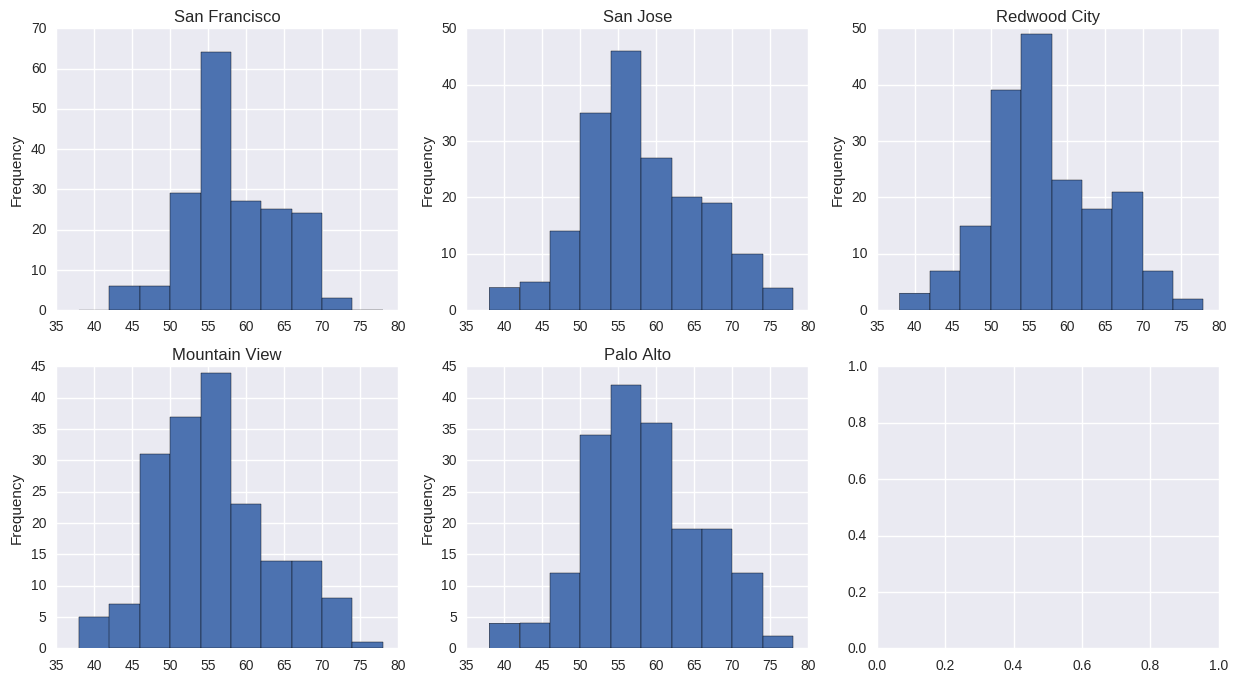

In [18]:
#平均気温
fig, axes = plt.subplots(2,3,figsize=(15,8))
cities = ['San Francisco','San Jose','Redwood City','Mountain View','Palo Alto']
targets = zip(cities,axes.flatten())
min_range = data_weather['Mean_Temperature_F'].min()
max_range = data_weather['Mean_Temperature_F'].max()
for i,(key, ax) in enumerate(targets):
    data_weather[data_weather['city']==key]['Mean_Temperature_F'].plot(kind='hist',title=key,ax=ax,range=[min_range,max_range])

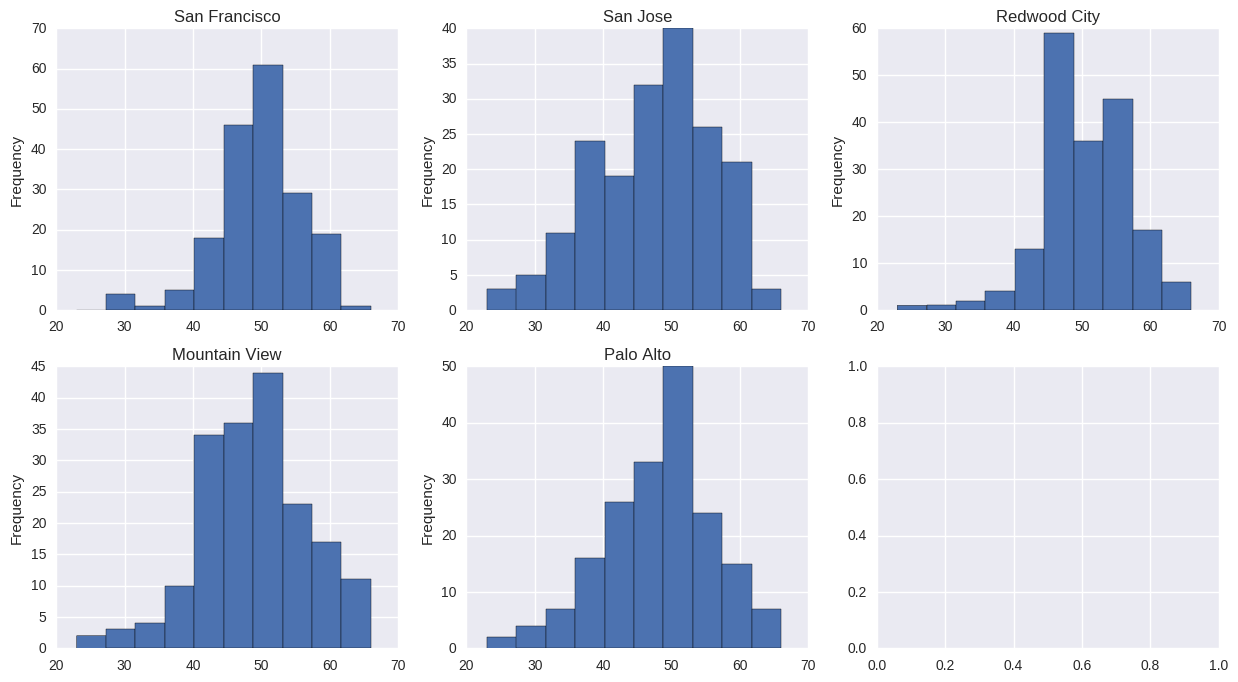

In [19]:
#平均露天
fig, axes = plt.subplots(2,3,figsize=(15,8))
cities = ['San Francisco','San Jose','Redwood City','Mountain View','Palo Alto']
targets = zip(cities,axes.flatten())
min_range = data_weather['Max_Dew_Point_F'].min()
max_range = data_weather['Max_Dew_Point_F'].max()
for i,(key, ax) in enumerate(targets):
    data_weather[data_weather['city']==key]['Max_Dew_Point_F'].plot(kind='hist',title=key,ax=ax,range=[min_range,max_range])

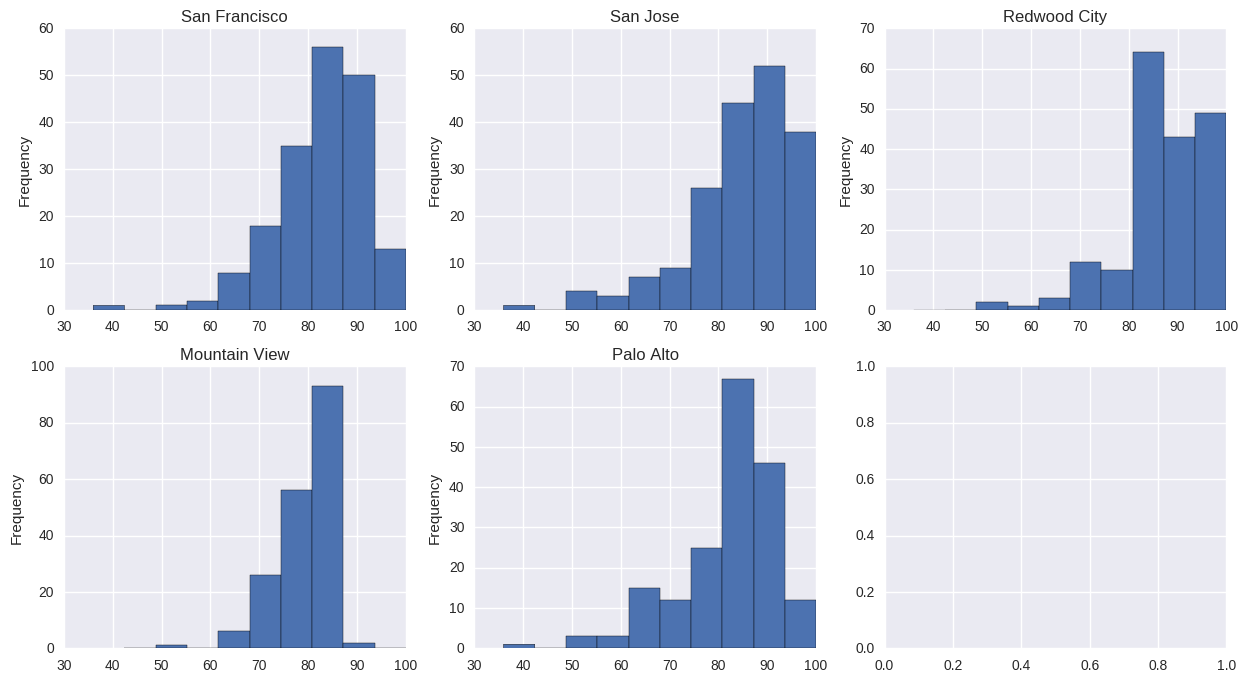

In [20]:
#平均湿度
fig, axes = plt.subplots(2,3,figsize=(15,8))
cities = ['San Francisco','San Jose','Redwood City','Mountain View','Palo Alto']
targets = zip(cities,axes.flatten())
min_range = data_weather['Max_Humidity'].min()
max_range = data_weather['Max_Humidity'].max()
for i,(key, ax) in enumerate(targets):
    data_weather[data_weather['city']==key]['Max_Humidity'].plot(kind='hist',title=key,ax=ax,range=[min_range,max_range])

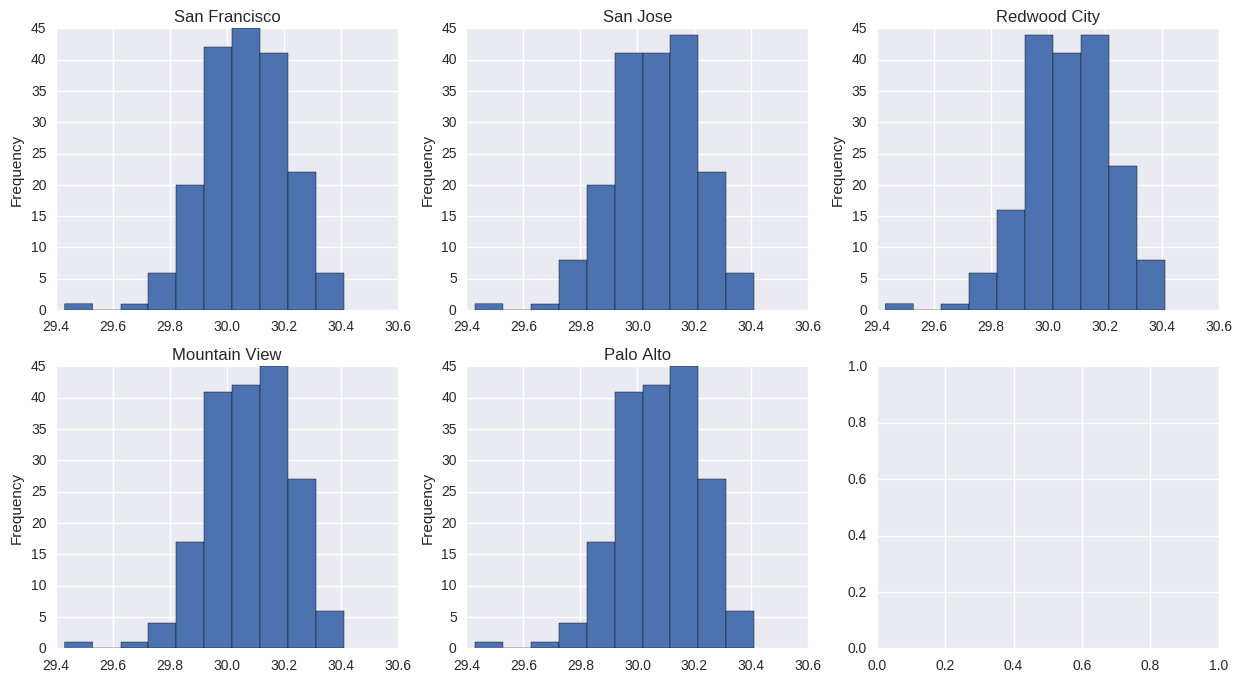

In [21]:
#平均海面気圧
fig, axes = plt.subplots(2,3,figsize=(15,8))
cities = ['San Francisco','San Jose','Redwood City','Mountain View','Palo Alto']
targets = zip(cities,axes.flatten())
min_range = data_weather['Mean_Sea_Level_Pressure_In'].min()
max_range = data_weather['Mean_Sea_Level_Pressure_In'].max()
for i,(key, ax) in enumerate(targets):
    data_weather[data_weather['city']==key]['Mean_Sea_Level_Pressure_In'].plot(kind='hist',title=key,ax=ax,range=[min_range,max_range])

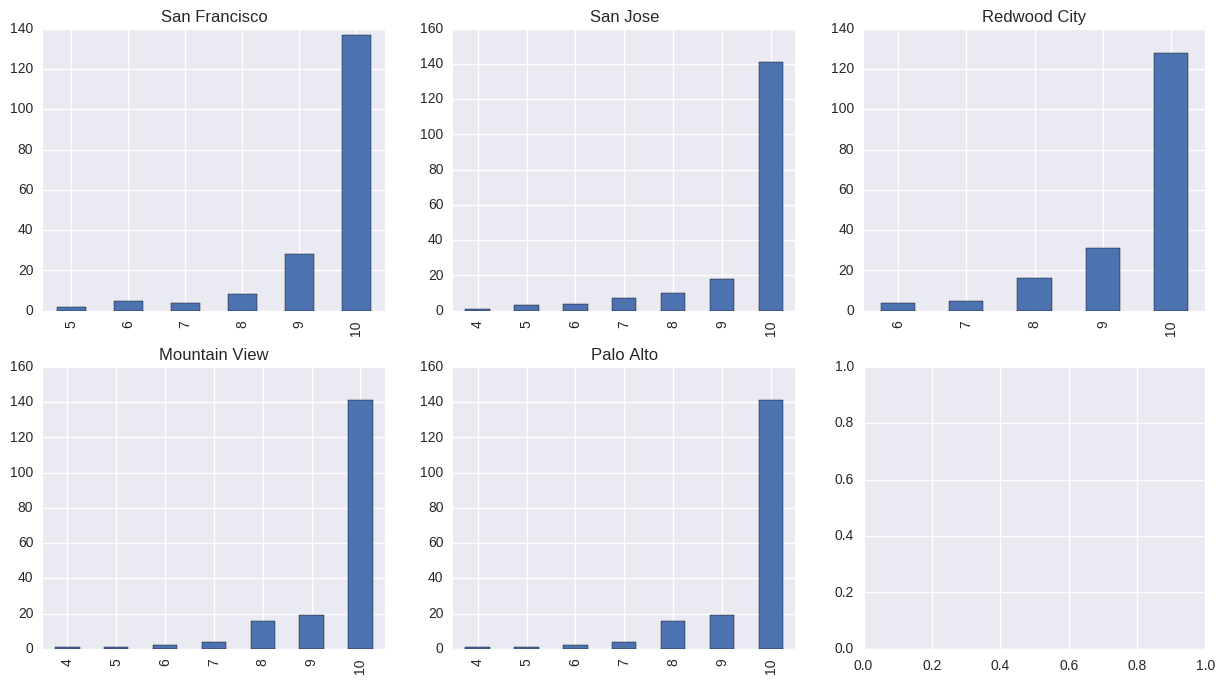

In [25]:
#平均視界
fig, axes = plt.subplots(2,3,figsize=(15,8))
cities = ['San Francisco','San Jose','Redwood City','Mountain View','Palo Alto']
targets = zip(cities,axes.flatten())
for i,(key, ax) in enumerate(targets):
    data_weather[data_weather['city']==key]['Mean_Visibility_Miles'].value_counts().sort_index().plot(kind='bar',title=key,ax=ax)

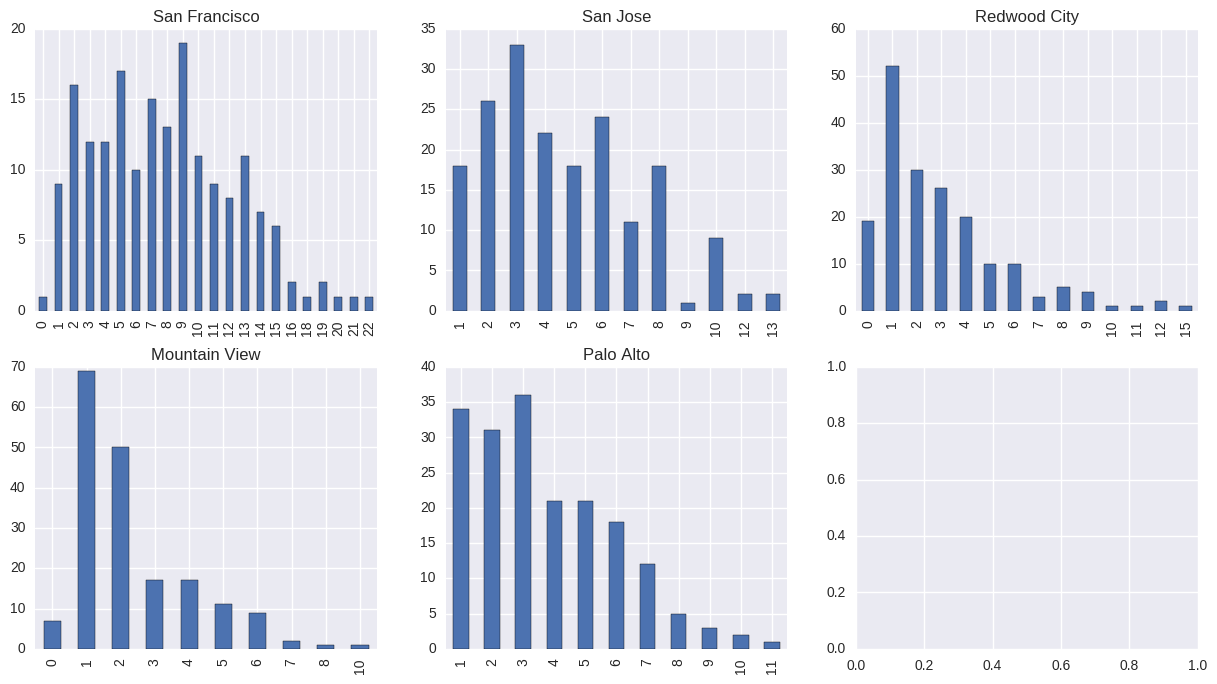

In [26]:
#平均風速
fig, axes = plt.subplots(2,3,figsize=(15,8))
cities = ['San Francisco','San Jose','Redwood City','Mountain View','Palo Alto']
targets = zip(cities,axes.flatten())
for i,(key, ax) in enumerate(targets):
    data_weather[data_weather['city']==key]['Mean_Wind_Speed_MPH'].value_counts().sort_index().plot(kind='bar',title=key,ax=ax)

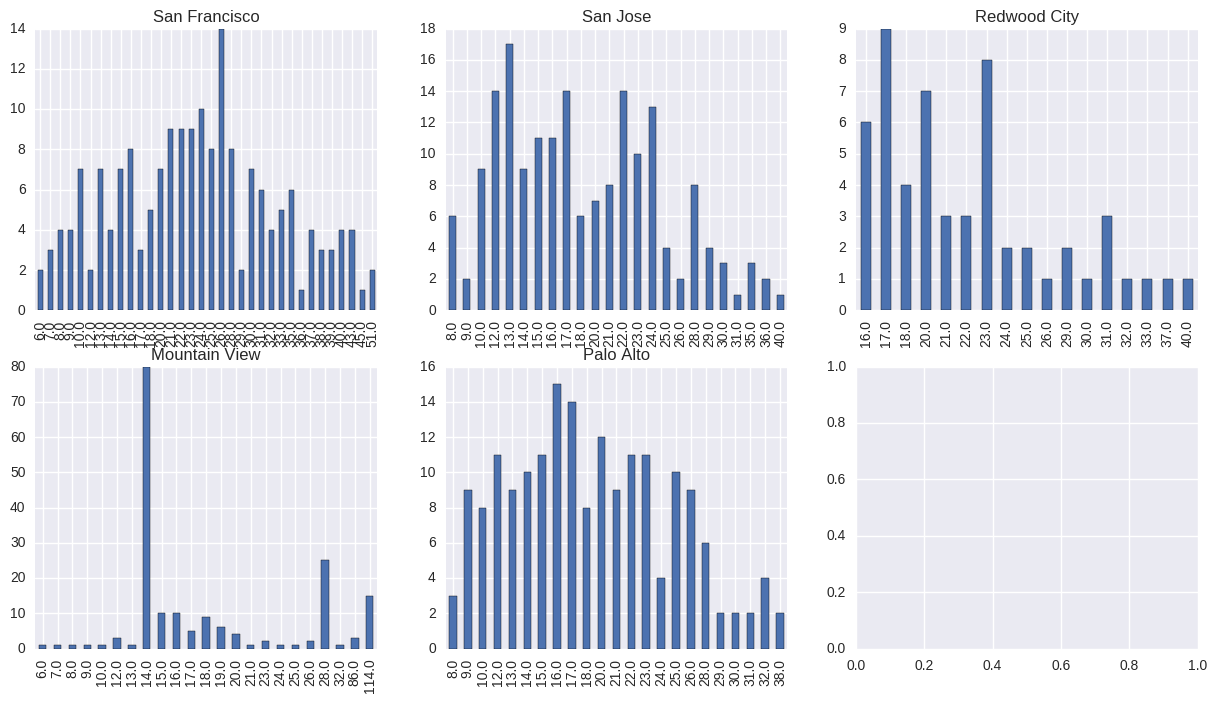

In [27]:
#突風 ほとんど風速と一緒
fig, axes = plt.subplots(2,3,figsize=(15,8))
cities = ['San Francisco','San Jose','Redwood City','Mountain View','Palo Alto']
targets = zip(cities,axes.flatten())
for i,(key, ax) in enumerate(targets):
    data_weather[data_weather['city']==key]['Max_Gust_Speed_MPH'].value_counts().sort_index().plot(kind='bar',title=key,ax=ax)

In [28]:
#降水量
T_mapping = {'T':np.NaN}
f = lambda x: T_mapping.get(x,x)
data_weather.Precipitation_In = data_weather.Precipitation_In.map(f).astype(float)

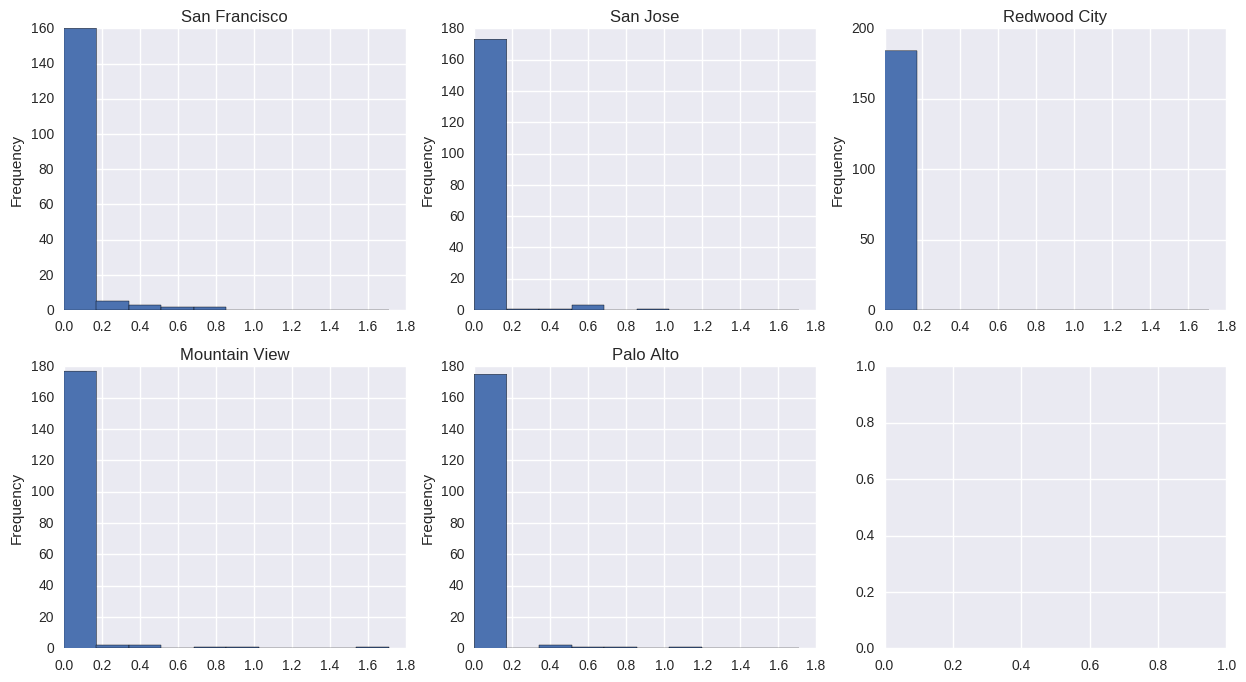

In [29]:
#降水量
fig, axes = plt.subplots(2,3,figsize=(15,8))
cities = ['San Francisco','San Jose','Redwood City','Mountain View','Palo Alto']
targets = zip(cities,axes.flatten())
min_range = data_weather['Precipitation_In'].min()
max_range = data_weather['Precipitation_In'].max()
for i,(key, ax) in enumerate(targets):
    data_weather[data_weather['city']==key]['Precipitation_In'].plot(kind='hist',title=key,ax=ax,range=[min_range,max_range])

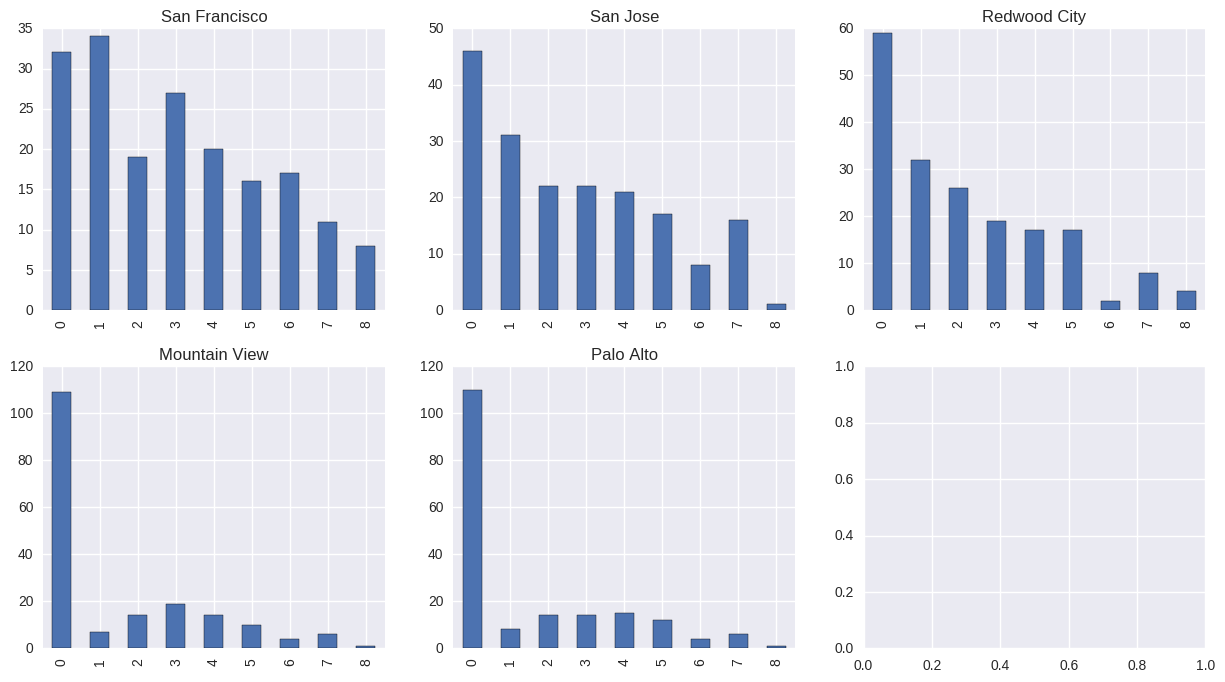

In [30]:
#雲量
fig, axes = plt.subplots(2,3,figsize=(15,8))
cities = ['San Francisco','San Jose','Redwood City','Mountain View','Palo Alto']
targets = zip(cities,axes.flatten())
for i,(key, ax) in enumerate(targets):
    data_weather[data_weather['city']==key]['Cloud_Cover'].value_counts().sort_index().plot(kind='bar',title=key,ax=ax)

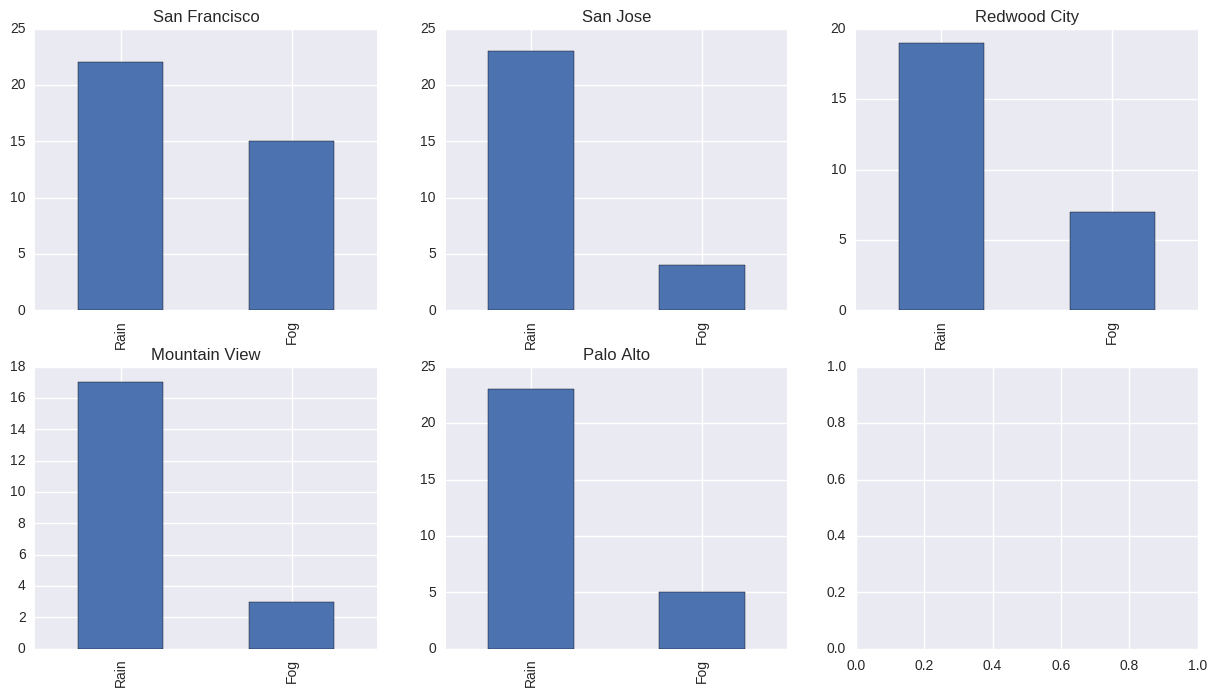

In [32]:
#天気
fig, axes = plt.subplots(2,3,figsize=(15,8))
cities = ['San Francisco','San Jose','Redwood City','Mountain View','Palo Alto']
targets = zip(cities,axes.flatten())
for i,(key, ax) in enumerate(targets):
    data_weather[data_weather['city']==key]['Events'].value_counts().plot(kind='bar',title=key,ax=ax)

In [34]:
data_weather.groupby(['city','Events'])['Events'].size()

city           Events
Mountain View  Fog        3
               Rain      17
Palo Alto      Fog        5
               Rain      23
Redwood City   Fog        7
               Rain      19
San Francisco  Fog       15
               Rain      22
San Jose       Fog        4
               Rain      23
dtype: int64

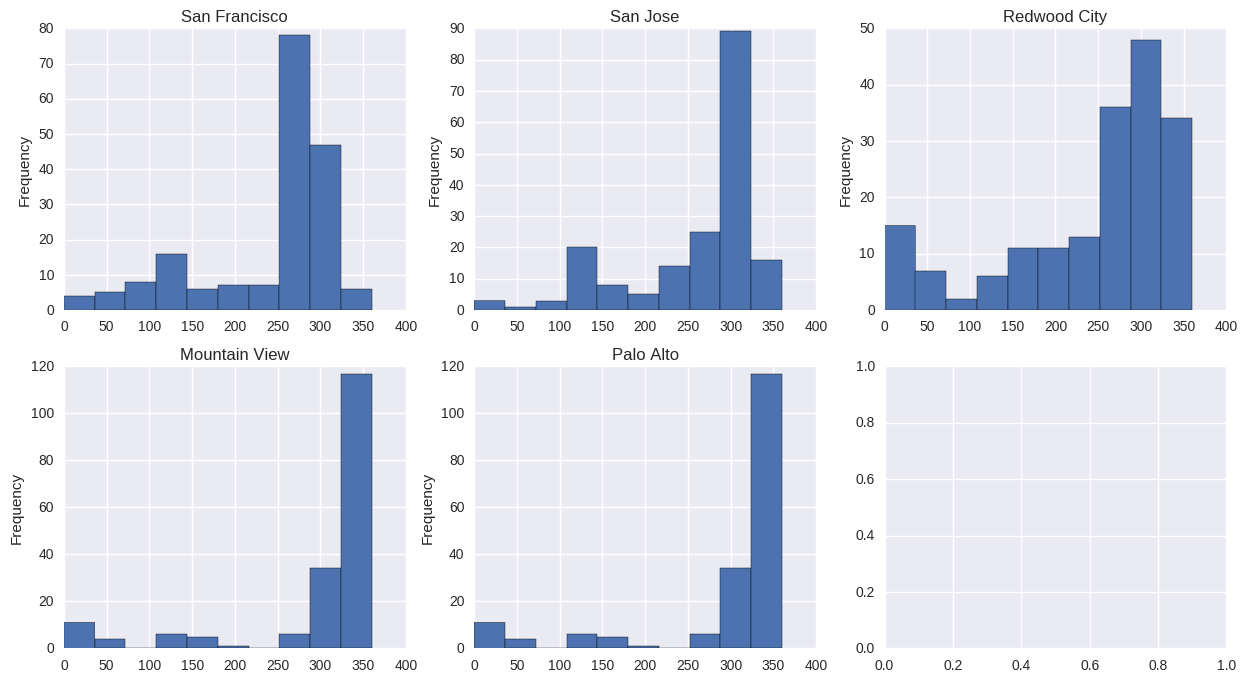

In [43]:
#風の方向 
fig, axes = plt.subplots(2,3,figsize=(15,8))
cities = ['San Francisco','San Jose','Redwood City','Mountain View','Palo Alto']
targets = zip(cities,axes.flatten())
min_range = data_weather[data_weather.Wind_Dir_Degrees<=360].min()
max_range = data_weather[data_weather.Wind_Dir_Degrees<=360].max()
for i,(key, ax) in enumerate(targets):
    data_weather[(data_weather['city']==key) & (data_weather.Wind_Dir_Degrees<=360)]['Wind_Dir_Degrees'].plot(kind='hist',title=key,ax=ax,range=[0,360])
#data_weather[data_weather.Wind_Dir_Degrees<=360].Wind_Dir_Degrees.plot(kind='hist')

### ステーションの稼働状況

In [44]:
data_status.head(5)

,station_id,bikes_available,docks_available,time
0,2,2,25,2013/08/29 12:06:01
1,2,2,25,2013/08/29 12:07:01
2,2,2,25,2013/08/29 12:08:01
3,2,2,25,2013/08/29 12:09:01
4,2,2,25,2013/08/29 12:10:01


In [46]:
#時間を変数変換
data_status.time = pd.to_datetime(data_status.time)

In [47]:
data_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16994602 entries, 0 to 16994601
Data columns (total 4 columns):
station_id         int64
bikes_available    int64
docks_available    int64
time               datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 518.6 MB


In [50]:
#ステーション毎のデータ数の確認
data_status.station_id.value_counts().sort_values()[:10]

83     12216
82     54298
80     85482
31     85583
32     85730
67    260488
71    260488
75    260488
74    260488
76    260488
Name: station_id, dtype: int64

- 年末年始から設置されたステーションのデータ数は少ない

In [119]:
station_id_split = np.array_split(data_station.station_id,8)

In [121]:
station_dock_count = data_station[['station_id','dockcount']]

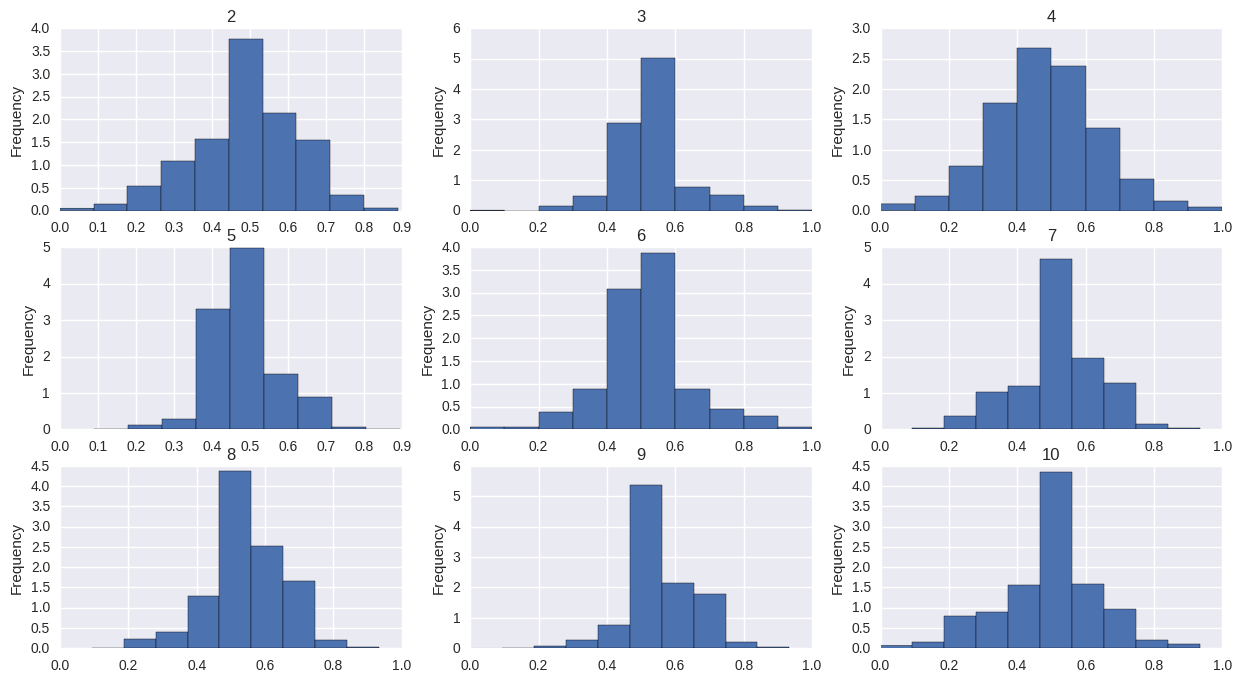

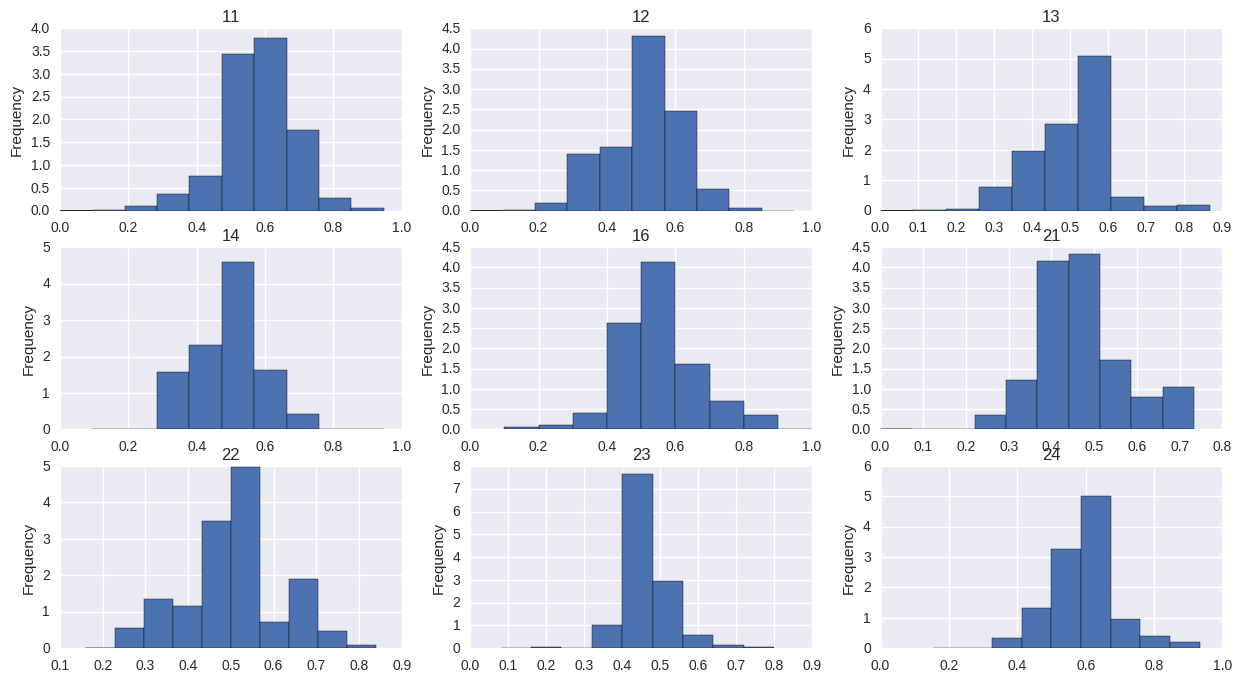

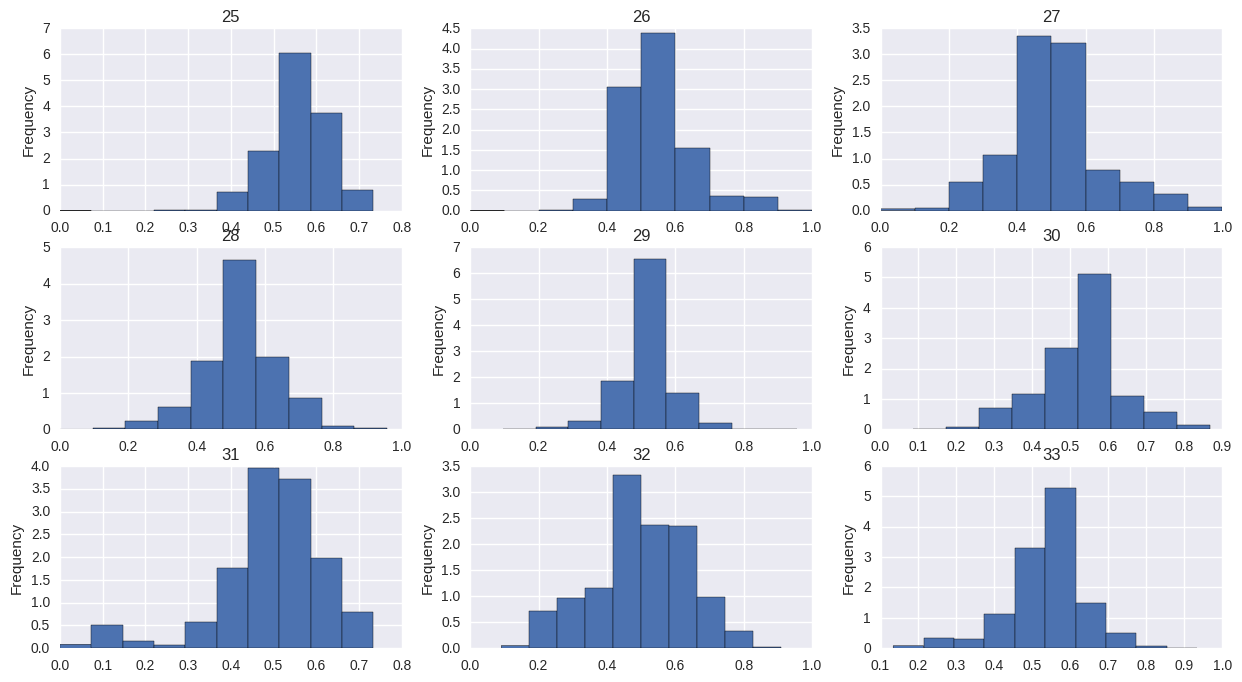

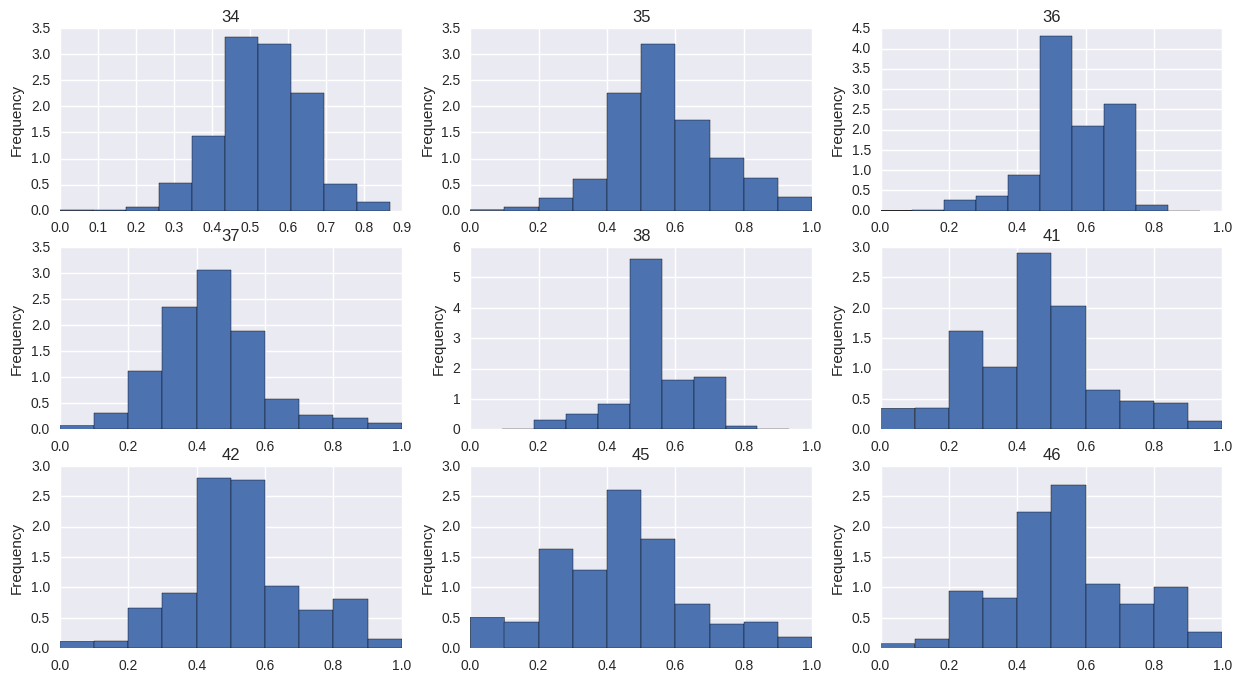

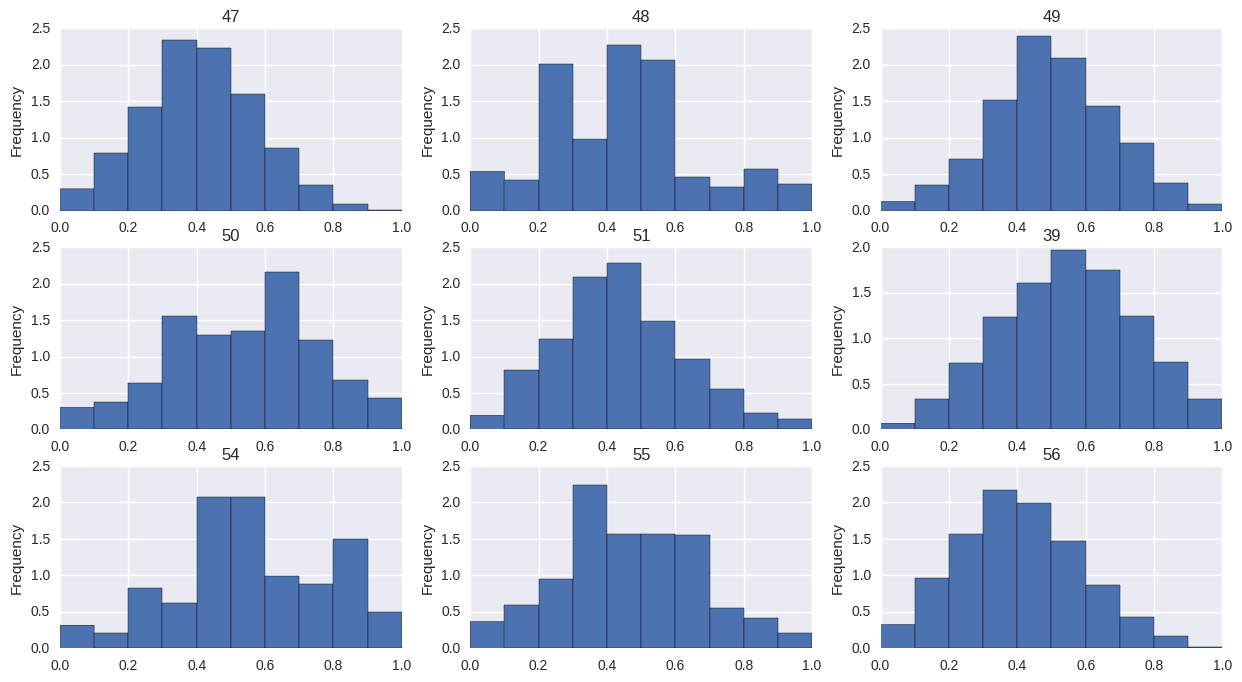

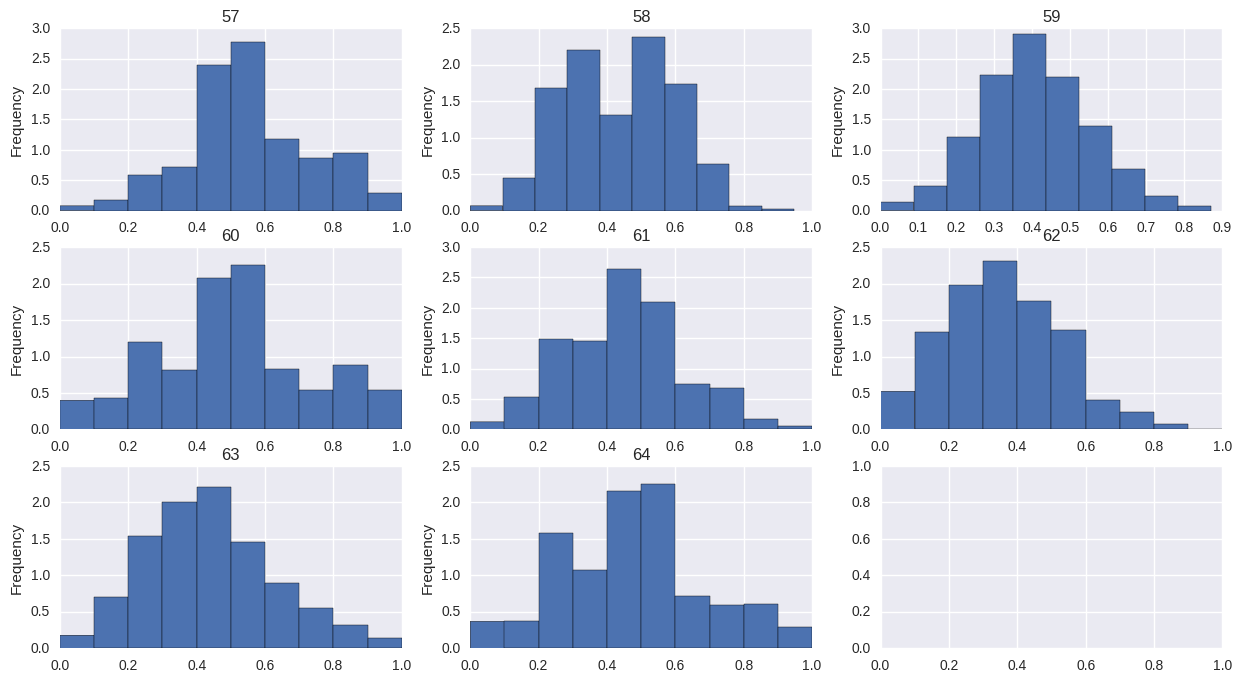

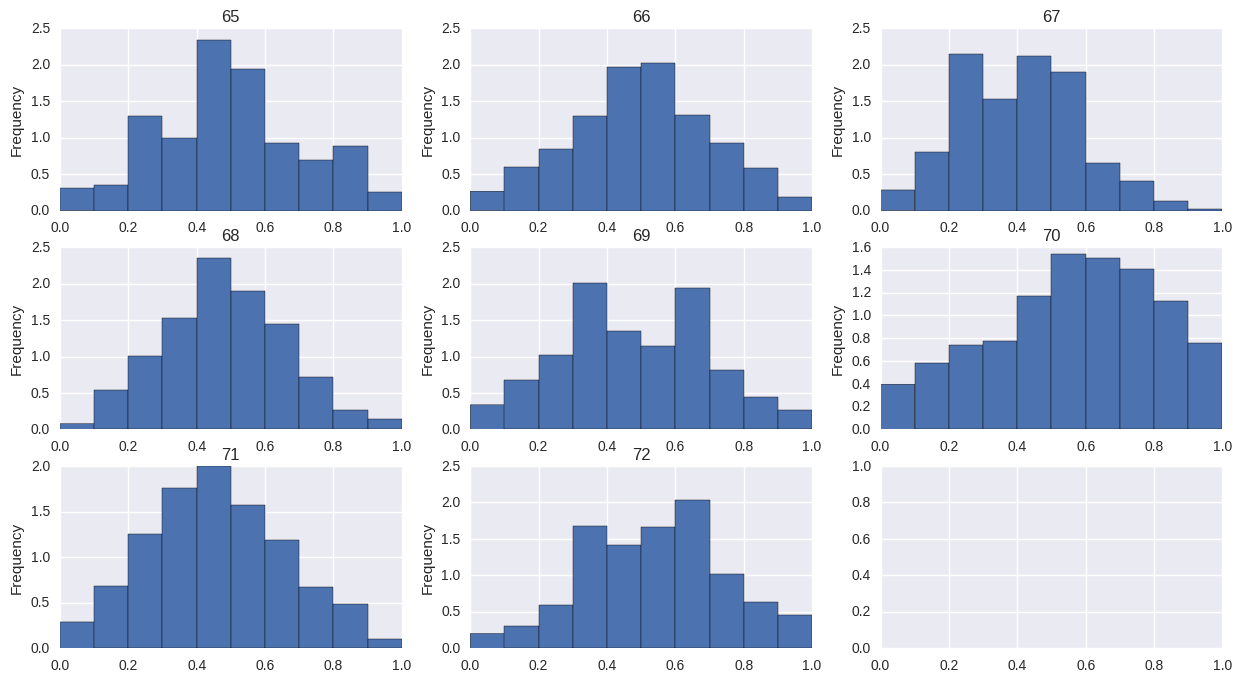

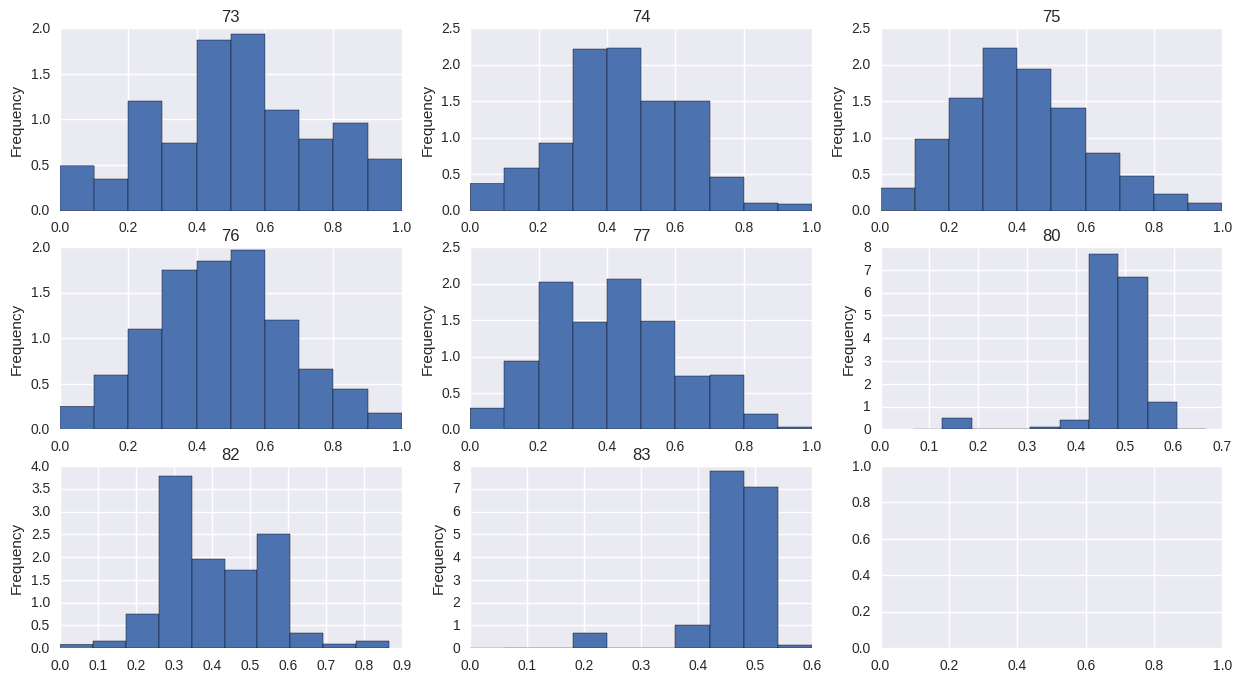

In [117]:
#稼働可能バイク数の分布
for j in range(len(station_id_split)):
    fig, axes = plt.subplots(3,3,figsize=(15,8))
    station_id = station_id_split[j]
    targets = zip(station_id,axes.flatten())
    for i,(st_id,ax) in enumerate(targets):
        data_status_sub = (data_status[data_status.station_id==st_id].bikes_available / float(station_dock_count[station_dock_count.station_id==st_id]['dockcount']))
        data_status_sub.plot(kind='hist',ax=ax,title=st_id,normed=True)

- 基本的には0.5の周りで分布しているが、例えば73などは裾のが広い分布になっている。

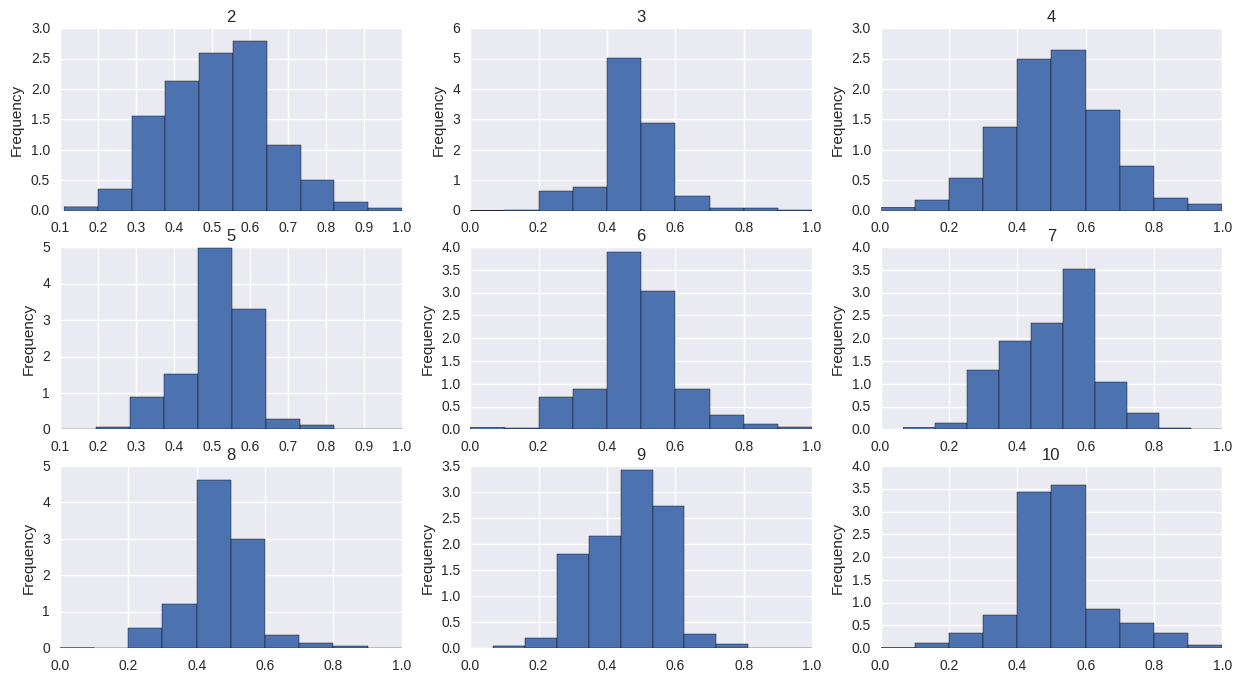

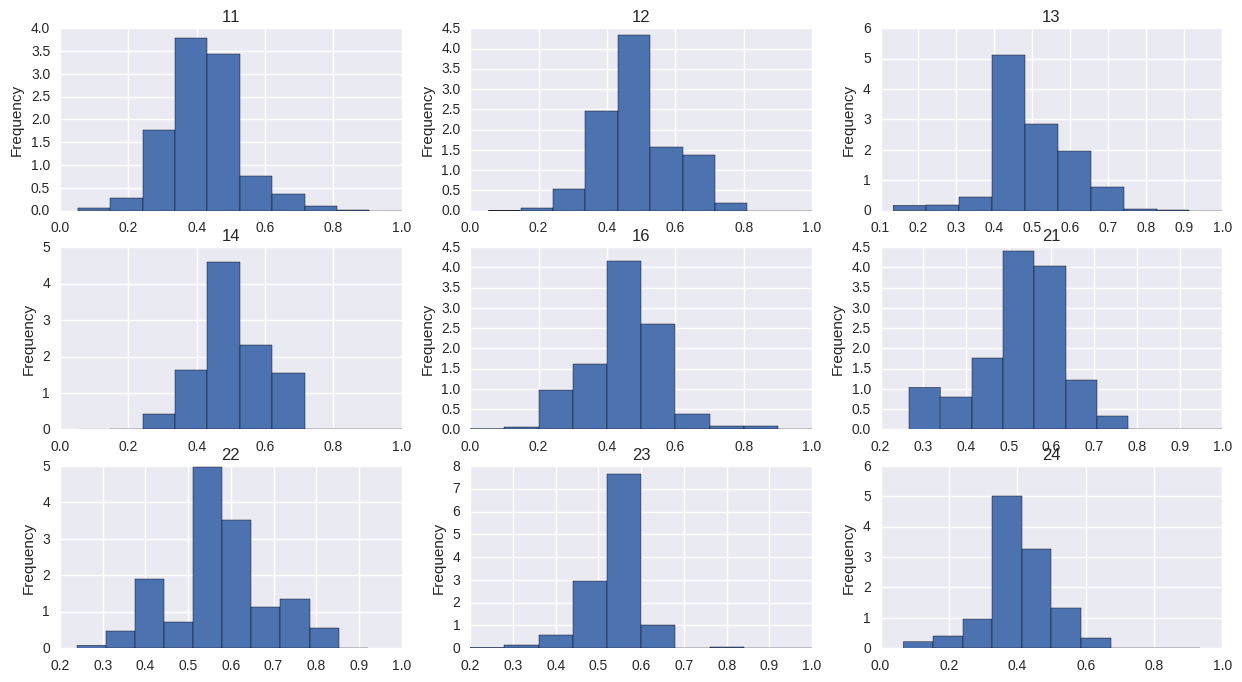

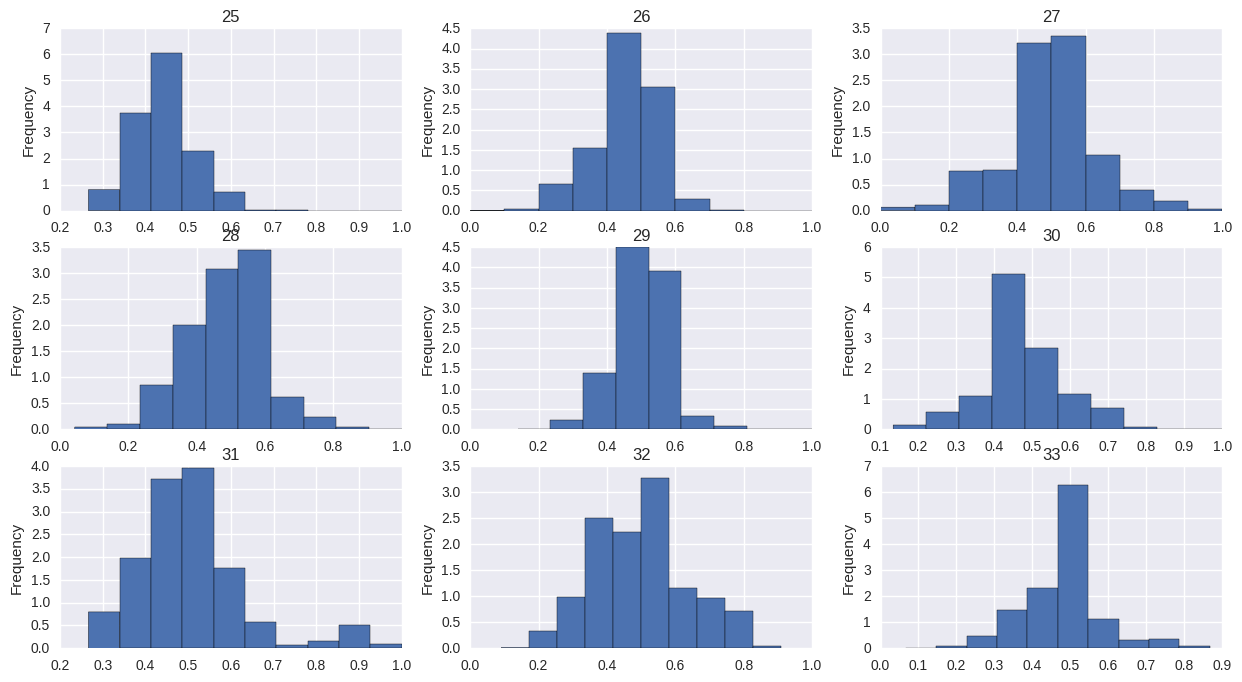

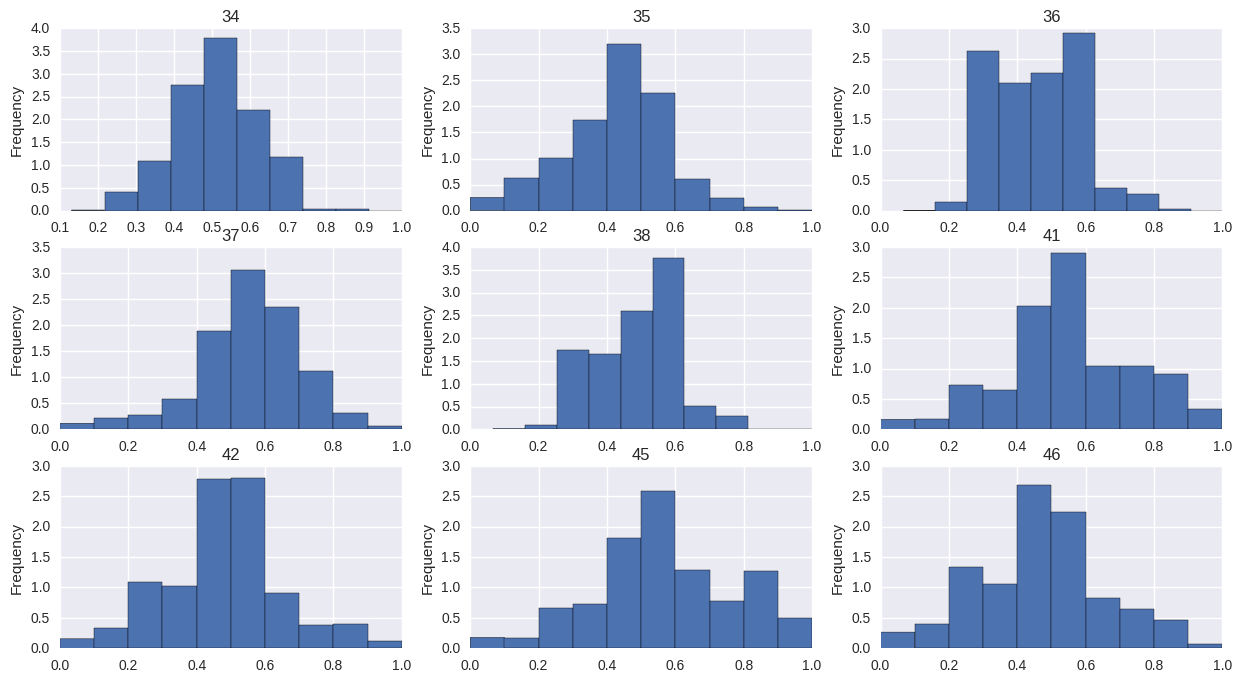

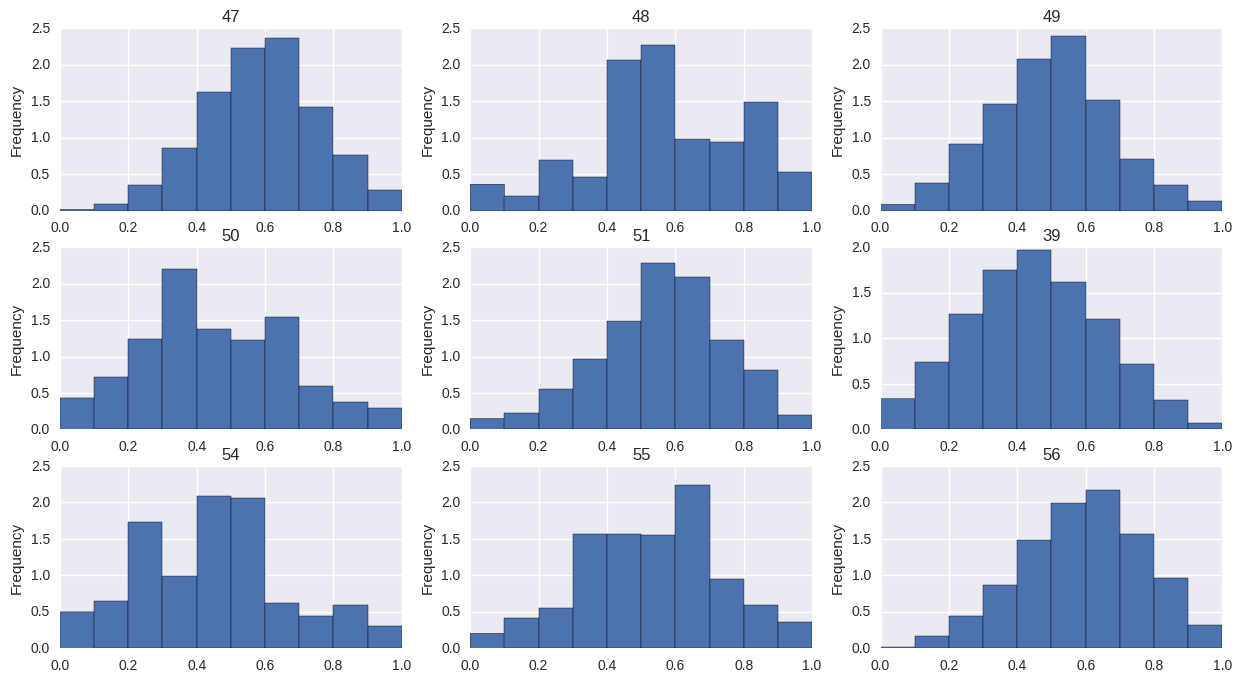

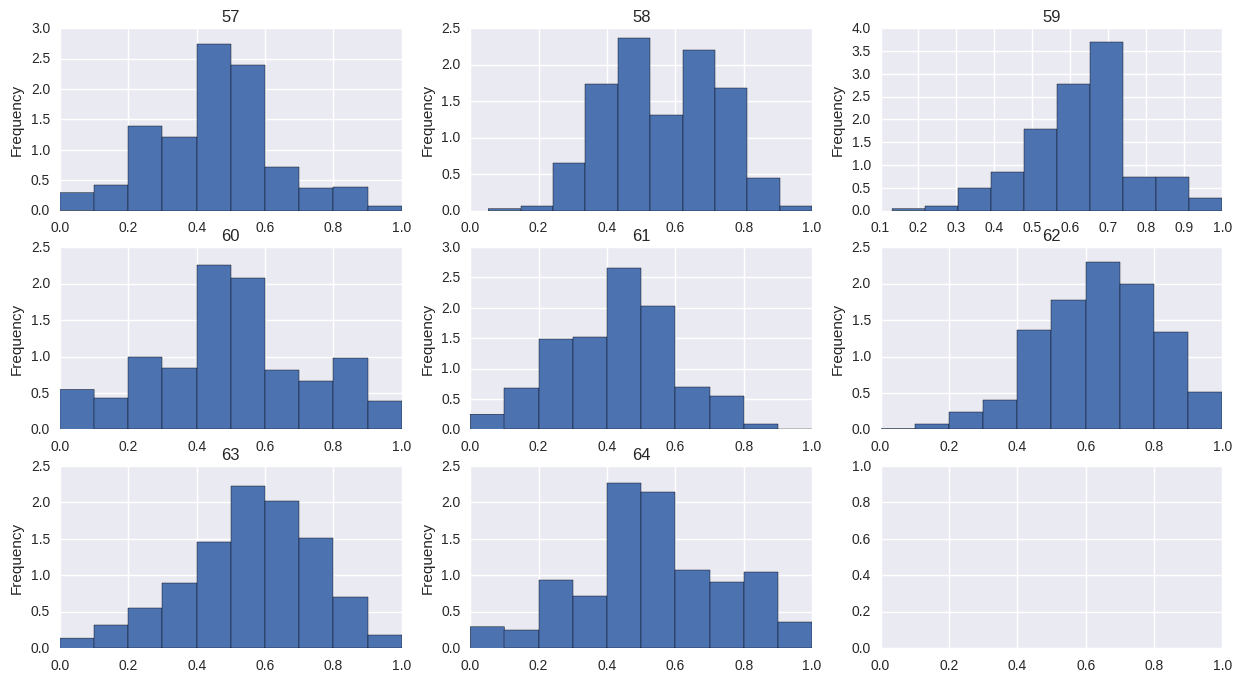

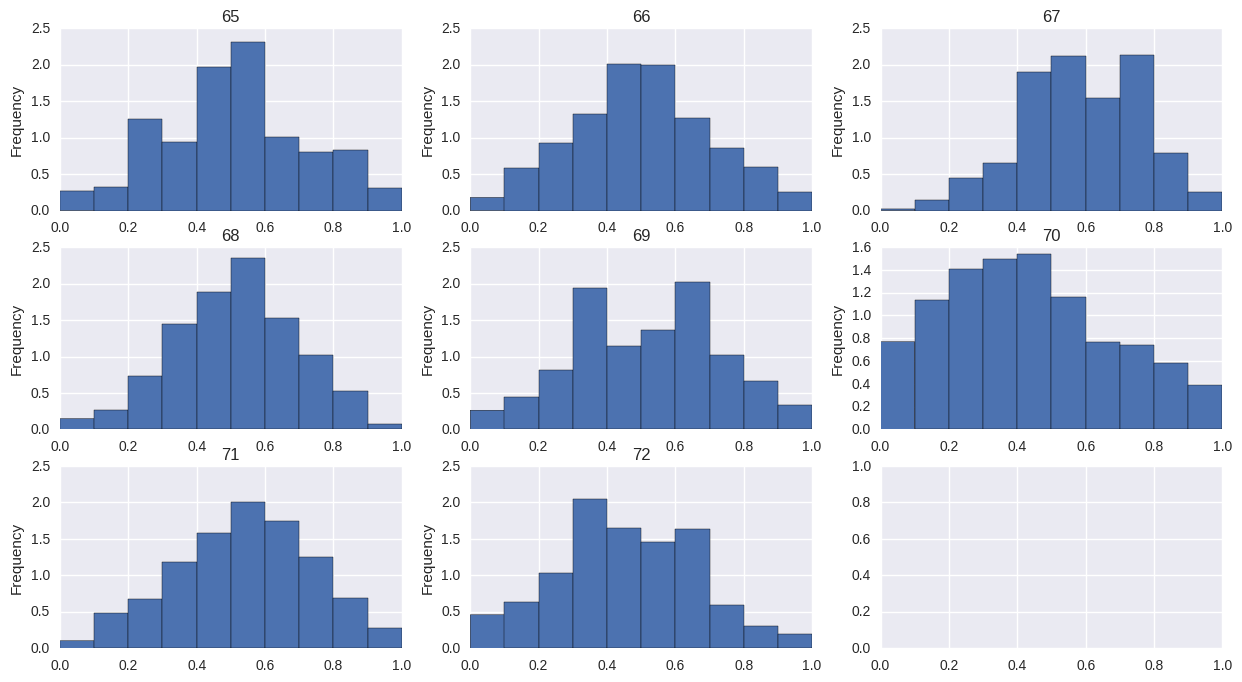

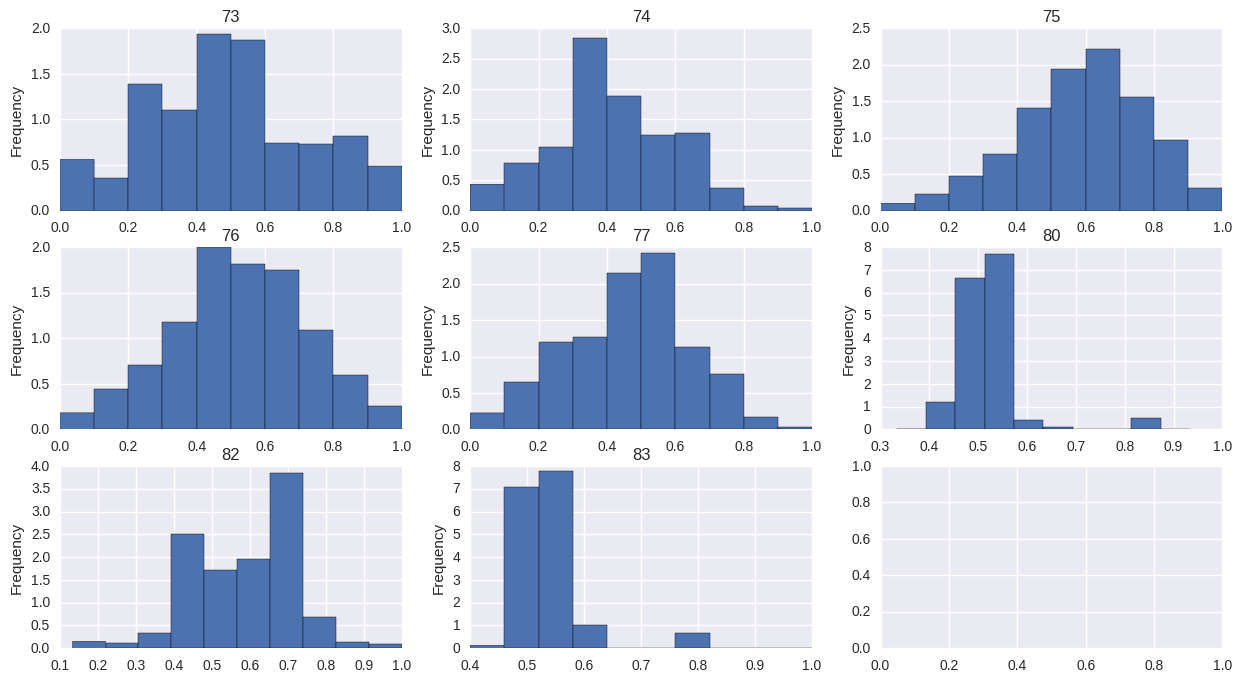

In [118]:
#稼働可能ドック数の分布
for j in range(len(station_id_split)):
    fig, axes = plt.subplots(3,3,figsize=(15,8))
    station_id = station_id_split[j]
    targets = zip(station_id,axes.flatten())
    for i,(st_id,ax) in enumerate(targets):
        data_status_sub = (data_status[data_status.station_id==st_id].docks_available / float(station_dock_count[station_dock_count.station_id==st_id]['dockcount']))
        data_status_sub.plot(kind='hist',ax=ax,title=st_id,normed=True)

- available bikeと同じ。

### バイクの情報

In [162]:
data_trip.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [142]:
data_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144015 entries, 0 to 144014
Data columns (total 11 columns):
Trip ID              144015 non-null int64
Duration             144015 non-null int64
Start Date           144015 non-null object
Start Station        144015 non-null object
Start Terminal       144015 non-null int64
End Date             144015 non-null object
End Station          144015 non-null object
End Terminal         144015 non-null int64
Bike #               144015 non-null int64
Subscription Type    144015 non-null object
Zip Code             137885 non-null object
dtypes: int64(5), object(6)
memory usage: 12.1+ MB


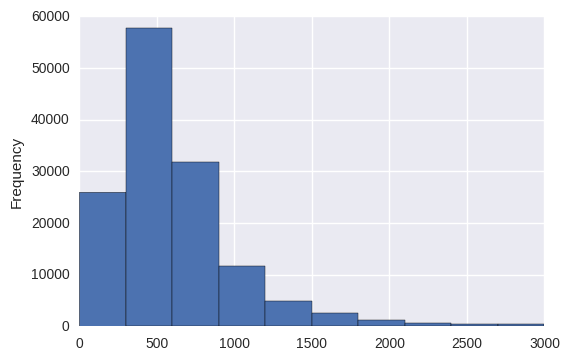

In [161]:
data_trip['Duration'].plot(kind='hist',range=[0,3000])

In [153]:
(data_trip['Duration'].sort_values(ascending=False)<=1800).sum() / float(data_trip.shape[0])

0.93551366177134321

- 93.6%の人は30分以内に返却している
- 多くの人は5〜10分の利用

In [168]:
station_id_landmark = data_station[['station_id','landmark']]

In [175]:
data_trip_landmark = pd.merge(data_trip,station_id_landmark,left_on='Start Terminal',right_on='station_id')

In [206]:
data_trip_landmark = pd.merge(data_trip_landmark,station_id_landmark,left_on='End Terminal',right_on='station_id')

In [207]:
data_trip_landmark.columns

Index([u'Trip ID', u'Duration', u'Start Date', u'Start Station',
       u'Start Terminal', u'End Date', u'End Station', u'End Terminal',
       u'Bike #', u'Subscription Type', u'Zip Code', u'station_id_x',
       u'Start_landmark', u'station_id_y', u'landmark'],
      dtype='object')

In [208]:
data_trip_landmark.rename(columns={'landmark':'End_landmark'},inplace=True)

In [200]:
#San Franciscoスタートのランク
data_trip_landmark[data_trip_landmark.Start_landmark=='San Francisco']['Start Station'].value_counts()

San Francisco Caltrain (Townsend at 4th)         9838
Harry Bridges Plaza (Ferry Building)             7343
Embarcadero at Sansome                           6545
Market at Sansome                                5922
Temporary Transbay Terminal (Howard at Beale)    5113
Market at 4th                                    5030
2nd at Townsend                                  4987
San Francisco Caltrain 2 (330 Townsend)          4976
Steuart at Market                                4913
Townsend at 7th                                  4493
2nd at South Park                                4458
Grant Avenue at Columbus Avenue                  4004
Powell Street BART                               3836
2nd at Folsom                                    3776
South Van Ness at Market                         3521
Market at 10th                                   3511
Embarcadero at Bryant                            3497
Spear at Folsom                                  3423
Howard at 2nd               

In [209]:
#SanFrancisco エンド
data_trip_landmark[data_trip_landmark.End_landmark=='San Francisco']['End Station'].value_counts()

San Francisco Caltrain (Townsend at 4th)         11637
Embarcadero at Sansome                            7590
Harry Bridges Plaza (Ferry Building)              7475
Market at Sansome                                 6238
2nd at Townsend                                   5655
San Francisco Caltrain 2 (330 Townsend)           5112
Market at 4th                                     5109
Steuart at Market                                 5080
Townsend at 7th                                   5073
2nd at South Park                                 4431
Temporary Transbay Terminal (Howard at Beale)     4356
Powell Street BART                                4211
Spear at Folsom                                   3554
Market at 10th                                    3388
Howard at 2nd                                     3211
Civic Center BART (7th at Market)                 3187
South Van Ness at Market                          3121
5th at Howard                                     3089
Embarcader

In [201]:
#San Joseスタートランキング
data_trip_landmark[data_trip_landmark.Start_landmark=='San Jose']['Start Station'].value_counts()

San Jose Diridon Caltrain Station    1972
Santa Clara at Almaden                855
Paseo de San Antonio                  745
San Jose City Hall                    740
San Pedro Square                      715
San Salvador at 1st                   597
MLK Library                           528
Japantown                             496
SJSU - San Salvador at 9th            489
SJSU 4th at San Carlos                389
St James Park                         366
San Jose Civic Center                 346
Arena Green / SAP Center              339
Adobe on Almaden                      335
San Jose Government Center             23
Name: Start Station, dtype: int64

In [210]:
#San Jose エンド
data_trip_landmark[data_trip_landmark.End_landmark=='San Jose']['End Station'].value_counts()

San Jose Diridon Caltrain Station    1820
San Pedro Square                      807
Santa Clara at Almaden                778
MLK Library                           748
Paseo de San Antonio                  720
San Salvador at 1st                   607
Japantown                             590
SJSU - San Salvador at 9th            534
San Jose City Hall                    510
SJSU 4th at San Carlos                434
San Jose Civic Center                 374
St James Park                         337
Adobe on Almaden                      331
Arena Green / SAP Center              324
San Jose Government Center             23
Name: End Station, dtype: int64

In [202]:
#Mountain Viewスタート
data_trip_landmark[data_trip_landmark.Start_landmark=='Mountain View']['Start Station'].value_counts()

Mountain View Caltrain Station           1154
Mountain View City Hall                   630
Rengstorff Avenue / California Street     248
San Antonio Caltrain Station              238
Evelyn Park and Ride                      218
Castro Street and El Camino Real          132
San Antonio Shopping Center               108
Name: Start Station, dtype: int64

In [212]:
#Mountain View エンド
data_trip_landmark[data_trip_landmark.End_landmark=='Mountain View']['End Station'].value_counts()

Mountain View Caltrain Station           1018
Mountain View City Hall                   742
Rengstorff Avenue / California Street     274
San Antonio Caltrain Station              272
Evelyn Park and Ride                      225
Castro Street and El Camino Real          129
San Antonio Shopping Center                93
Name: End Station, dtype: int64

In [203]:
#Palo Altoスタート
data_trip_landmark[data_trip_landmark.Start_landmark=='Palo Alto']['Start Station'].value_counts()

University and Emerson             434
Palo Alto Caltrain Station         431
Cowper at University               355
California Ave Caltrain Station    297
Park at Olive                      189
Name: Start Station, dtype: int64

In [213]:
#Palo Alto エンド
data_trip_landmark[data_trip_landmark.End_landmark=='Palo Alto']['End Station'].value_counts()

University and Emerson             541
Palo Alto Caltrain Station         373
California Ave Caltrain Station    286
Cowper at University               283
Park at Olive                      209
Name: End Station, dtype: int64

In [204]:
#Redwood Cityスタート
data_trip_landmark[data_trip_landmark.Start_landmark=='Redwood City']['Start Station'].value_counts()

Redwood City Caltrain Station    378
Redwood City Medical Center      123
San Mateo County Center          101
Franklin at Maple                 99
Broadway at Main                  45
Redwood City Public Library       44
Mezes Park                         3
Name: Start Station, dtype: int64

In [214]:
#Redwood City エンド
data_trip_landmark[data_trip_landmark.End_landmark=='Redwood City']['End Station'].value_counts()

Redwood City Caltrain Station    228
Redwood City Medical Center      178
Redwood City Public Library      117
San Mateo County Center          106
Franklin at Maple                 93
Broadway at Main                  56
Mezes Park                         5
Name: End Station, dtype: int64

In [218]:
data_trip_landmark.groupby(['Start_landmark','End_landmark'])['Trip ID'].size().unstack()

End_landmark,Mountain View,Palo Alto,Redwood City,San Francisco,San Jose
Start_landmark,,,,,
Mountain View,2641.0,83.0,1.0,1.0,2.0
Palo Alto,108.0,1588.0,9.0,1.0,NaN
Redwood City,2.0,18.0,771.0,1.0,1.0
San Francisco,NaN,3.0,2.0,129845.0,3.0
San Jose,2.0,NaN,NaN,2.0,8931.0


- 市間移動をする人もいるらいしいが、数は少ない

In [225]:
data_trip_landmark.groupby(['Start Station','End Station'])['Trip ID'].size().sort_values(ascending=False)[:10]

Start Station                             End Station                             
Harry Bridges Plaza (Ferry Building)      Embarcadero at Sansome                      1330
Townsend at 7th                           San Francisco Caltrain (Townsend at 4th)    1322
San Francisco Caltrain 2 (330 Townsend)   Townsend at 7th                             1116
Market at Sansome                         2nd at South Park                            866
Embarcadero at Sansome                    Steuart at Market                            811
2nd at South Park                         Market at Sansome                            798
San Francisco Caltrain (Townsend at 4th)  Harry Bridges Plaza (Ferry Building)         782
2nd at Townsend                           Harry Bridges Plaza (Ferry Building)         757
Steuart at Market                         Embarcadero at Sansome                       717
Harry Bridges Plaza (Ferry Building)      2nd at Townsend                              710
dtype: 

In [232]:
data_trip_landmark['Bike #'].unique().shape

(689,)

- 利用されている自転車は689台

In [236]:
data_trip_landmark.groupby(['Bike #','Start_landmark'])['Trip ID'].size().unstack()

Start_landmark,Mountain View,Palo Alto,Redwood City,San Francisco,San Jose
Bike #,,,,,
9,NaN,13.0,2.0,NaN,NaN
10,11.0,NaN,5.0,NaN,22.0
11,3.0,2.0,1.0,NaN,60.0
12,12.0,3.0,NaN,NaN,39.0
13,17.0,15.0,5.0,NaN,NaN
14,3.0,12.0,1.0,NaN,35.0
15,5.0,11.0,1.0,NaN,22.0
16,76.0,4.0,NaN,NaN,27.0
17,NaN,14.0,11.0,NaN,NaN


- 定期かはわからんがシャッフルされているようだ

In [237]:
data_trip_landmark[data_trip_landmark['Bike #']==717]

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code,station_id_x,Start_landmark,station_id_y,End_landmark
129718,161927,352,1/22/2014 13:30,Santa Clara at Almaden,4,1/22/2014 13:36,San Jose City Hall,10,717,Subscriber,95112,4,San Jose,10,San Jose
130035,156588,716,1/17/2014 7:33,San Jose Diridon Caltrain Station,2,1/17/2014 7:45,San Jose City Hall,10,717,Subscriber,94502,2,San Jose,10,San Jose
130222,156926,100,1/17/2014 9:53,San Jose City Hall,10,1/17/2014 9:54,MLK Library,11,717,Subscriber,95112,10,San Jose,11,San Jose
130741,181650,632,2/12/2014 8:14,San Jose Diridon Caltrain Station,2,2/12/2014 8:24,MLK Library,11,717,Subscriber,94041,2,San Jose,11,San Jose
131298,41059,428,10/1/2013 7:46,San Jose Diridon Caltrain Station,2,10/1/2013 7:53,San Pedro Square,6,717,Subscriber,95377,2,San Jose,6,San Jose
131883,177154,305,2/5/2014 17:12,San Jose City Hall,10,2/5/2014 17:17,San Salvador at 1st,8,717,Subscriber,95113,10,San Jose,8,San Jose
132732,128115,419,12/17/2013 8:55,Santa Clara at Almaden,4,12/17/2013 9:02,SJSU 4th at San Carlos,12,717,Subscriber,95110,4,San Jose,12,San Jose
132802,177553,146,2/6/2014 8:57,San Salvador at 1st,8,2/6/2014 8:59,SJSU 4th at San Carlos,12,717,Subscriber,95112,8,San Jose,12,San Jose
132841,150654,2106,1/12/2014 15:20,Japantown,9,1/12/2014 15:55,SJSU 4th at San Carlos,12,717,Customer,95148,9,San Jose,12,San Jose
132952,51562,139,10/9/2013 13:47,Paseo de San Antonio,7,10/9/2013 13:49,SJSU 4th at San Carlos,12,717,Subscriber,95110,7,San Jose,12,San Jose


In [238]:
data_trip_landmark['Subscription Type'].value_counts()

Subscriber    113647
Customer       30368
Name: Subscription Type, dtype: int64

In [243]:
data_trip_landmark['Zip Code'].value_counts()[:10]

94107    15903
94105    12024
94133     6956
94103     5280
94102     4764
94111     4707
94109     3698
95112     3076
94117     2965
94158     2434
Name: Zip Code, dtype: int64